In [121]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import nni

In [122]:
# def func(x, noise):
#     return -np.sin(3*x) - x**2 + 0.7*x + noise * np.random.randn(*x.shape)

def func(x):
    return np.cos(2*x)

def diff_func(x,noise):
    return -2*np.sin(2*x) + noise * np.random.randn(*x.shape)

In [123]:
interval = (0.0,np.pi/2)
numpoints = 500
noise = 0.0
datapoints = np.random.uniform(*interval,numpoints)

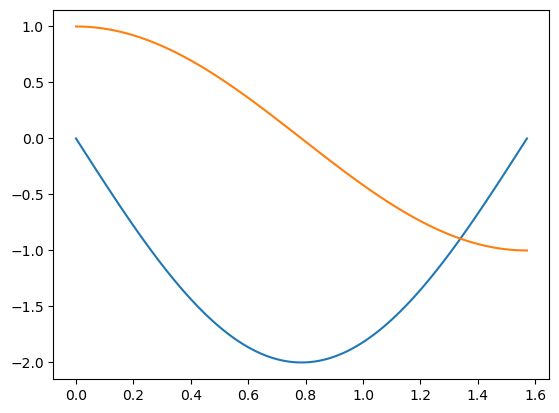

In [124]:
grid = np.linspace(*interval,101)

plt.plot(grid,diff_func(grid,0.0))
plt.plot(grid,func(grid))

In [125]:
activation_function = "tanh"
model = MLPRegressor((500,),activation=activation_function,solver="lbfgs")

In [126]:
model.fit(datapoints.reshape(-1,1),diff_func(datapoints,noise))

MLPRegressor(activation='tanh', hidden_layer_sizes=(500,), solver='lbfgs')

In [127]:
integrated_function = np.zeros_like(grid)

for i,point in enumerate(grid[1:]):
    bounds = np.array([[interval[0]],[point]])
    # bounds = (interval[0],point)
    integrated_function[i+1] = nni.integrate_ND_1L(bounds,model.coefs_,model.intercepts_,activation_function)

bounds = np.array([[interval[0]],[interval[1]]])
integral = nni.integrate_ND_1L(bounds,model.coefs_,model.intercepts_,activation_function)

In [128]:
print(integral)

-1.9995425077131421


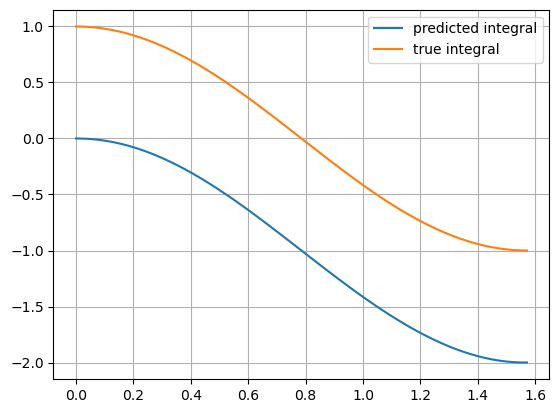

In [129]:
plt.plot(grid,integrated_function, label="predicted integral")
plt.plot(grid,func(grid), label="true integral")
plt.legend()
plt.grid()

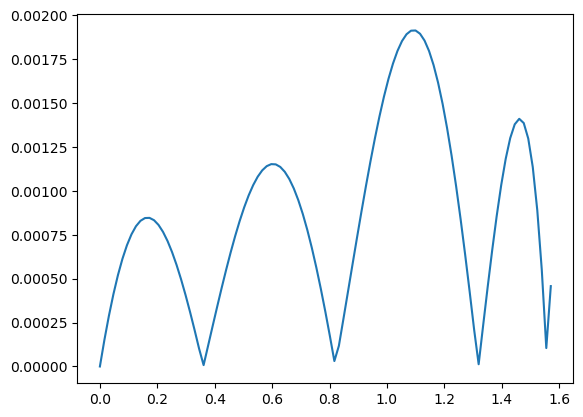

In [130]:
plt.plot(grid,np.abs(integrated_function+func(0) - func(grid)))